In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from itertools import product

In [30]:
X = [10]
Y = [10]
Z = [1]
beta = [1]
B = np.linspace(0, 1, 11)
J = np.linspace(0, 1, 11)
iters = [10_000_000]

input_set = product(X, Y, Z, beta, B, J, iters)

In [31]:
input_frame = pd.DataFrame(data=input_set, columns = ["X", "Y", "Z", "beta", "B", "J", "iters"])

In [32]:
input_frame

,X,Y,Z,beta,B,J,iters
0,10,10,1,1,0.0,0.0,10000000
1,10,10,1,1,0.0,0.1,10000000
2,10,10,1,1,0.0,0.2,10000000
3,10,10,1,1,0.0,0.3,10000000
4,10,10,1,1,0.0,0.4,10000000
...,...,...,...,...,...,...,...
116,10,10,1,1,1.0,0.6,10000000
117,10,10,1,1,1.0,0.7,10000000
118,10,10,1,1,1.0,0.8,10000000
119,10,10,1,1,1.0,0.9,10000000


In [33]:
input_frame.to_csv("../data/params.csv", index=False)

In [63]:
results = pd.read_csv('../data/results.csv', delimiter=',')

In [64]:
results

,X,Y,Z,beta,B,J,iter,mag
0,10,10,1,1,0.0,0.0,10000000,0.000016
1,10,10,1,1,0.0,0.1,10000000,0.000041
2,10,10,1,1,0.0,0.2,10000000,0.001006
3,10,10,1,1,0.0,0.3,10000000,0.003780
4,10,10,1,1,0.0,0.4,10000000,0.017188
...,...,...,...,...,...,...,...,...
116,10,10,1,1,1.0,0.6,10000000,0.997637
117,10,10,1,1,1.0,0.7,10000000,0.998973
118,10,10,1,1,1.0,0.8,10000000,0.999555
119,10,10,1,1,1.0,0.9,10000000,0.999791


In [65]:
def plot_heatmap(data, xlabels=None, ylabels=None, title=None, cmap="viridis", annot=True):
    plt.figure(figsize=(8, 6))
    
    ax = sns.heatmap(
        data,
        annot=annot,
        fmt=".2f",
        cmap=cmap,
        xticklabels=xlabels,
        yticklabels=ylabels,
        linewidths=.5,
        cbar=True
    )
    
    if title:
        ax.set_title(title, fontsize=14, pad=12)

    plt.tight_layout()
    plt.show()

In [66]:
results[["B", "J", "mag"]]

,B,J,mag
0,0.0,0.0,0.000016
1,0.0,0.1,0.000041
2,0.0,0.2,0.001006
3,0.0,0.3,0.003780
4,0.0,0.4,0.017188
...,...,...,...
116,1.0,0.6,0.997637
117,1.0,0.7,0.998973
118,1.0,0.8,0.999555
119,1.0,0.9,0.999791


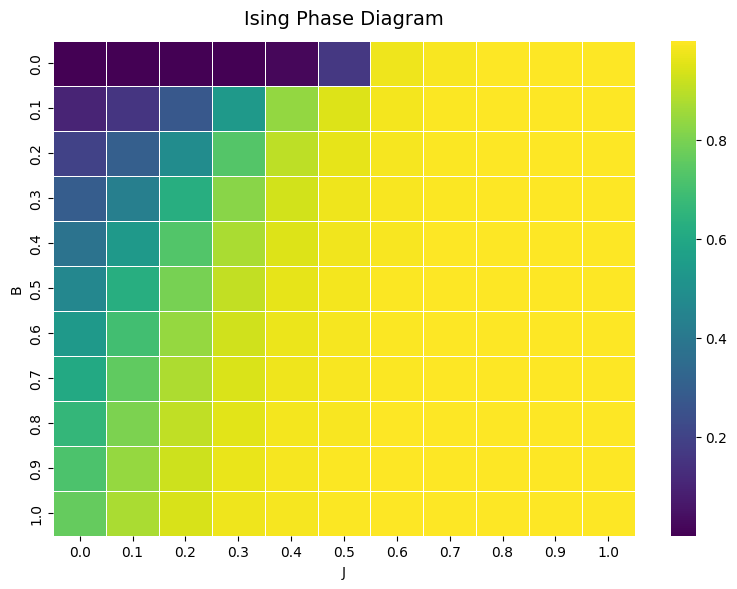

In [67]:
# Example 1: NumPy data
data = results[["B", "J", "mag"]].pivot(index="B", columns="J", values="mag")

# Example 2: Pandas DataFrame
# df = pd.DataFrame(np.random.randn(10, 8), columns=[f"C{i}" for i in range(8)])

plot_heatmap(
    data=data,
    xlabels=[col for col in data.columns],
    ylabels=[ind for ind in data.index],
    title="Ising Phase Diagram",
    annot=False
)

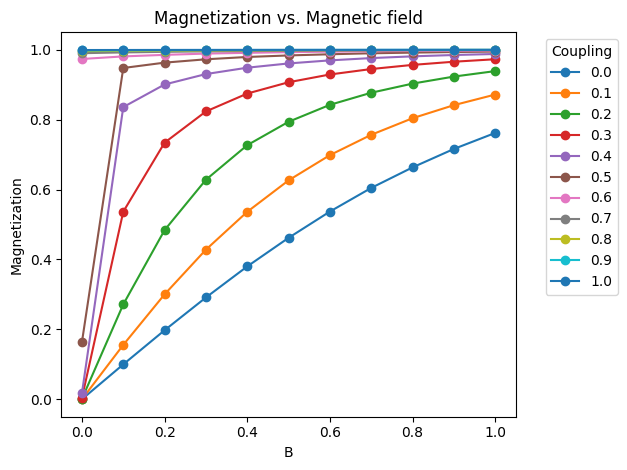

In [68]:
for col in data.columns:
    plt.plot(data.index, data[col], marker='o', label=str(col))

plt.xlabel("B")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Magnetic field")
plt.legend(title="Coupling", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

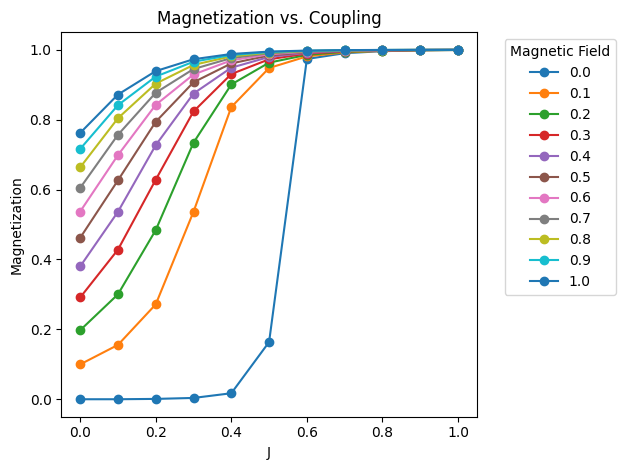

In [69]:
for row in data.index:
    plt.plot(data.columns, data.loc[row], marker='o', label=str(row))

plt.xlabel("J")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Coupling")
plt.legend(title="Magnetic Field", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
